# County-level maps of FEMA disasters

We found a FEMA archive of disasters throughout the USA, split up by county. [Source](https://www.fema.gov/media-library/assets/documents/28318).  We collected that information into a single CSV file in a different notebook.  In this notebook, I integrate disaster data with the map file of US counties.

Our map of counties comes from [this source](https://community.esri.com/thread/24614).

### A note about FIPS codes
[FIPS codes](https://en.wikipedia.org/wiki/FIPS_county_code) are unique identifiers for used by the US government for identifying states and counties (or county-equivalent areas). Each county has a full FIPS code that contains two digits for the state and three for the county within that state.

In [1]:
import numpy as np
import geopandas
import pandas as pd

## County map

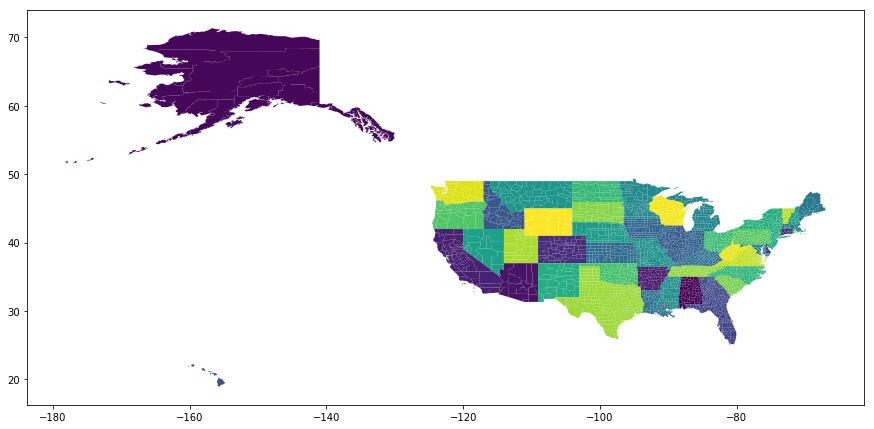

In [5]:
# Import a shape file with all the counties in the US.
counties = geopandas.read_file('../data_input/1_USCounties/')

# Turn state codes from strings to integers
for col in ['STATE_FIPS', 'CNTY_FIPS', 'FIPS']:
    counties[col] = counties[col].astype(int)
    
# County shapes, with brighter colors tied to higher state codes
counties.plot(column='STATE_FIPS', figsize=(15,15));

In [6]:
print(counties.shape)
counties.head(5)

(3141, 6)


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry
0,Lake of the Woods,Minnesota,27,77,27077,"POLYGON ((-95.34283127277658 48.546679319076, ..."
1,Ferry,Washington,53,19,53019,POLYGON ((-118.8516288013387 47.94956368481996...
2,Stevens,Washington,53,65,53065,"POLYGON ((-117.438831576286 48.04411548512263,..."
3,Okanogan,Washington,53,47,53047,"POLYGON ((-118.972093862835 47.93915200536639,..."
4,Pend Oreille,Washington,53,51,53051,POLYGON ((-117.4385804303028 48.99991850672649...


# FEMA data

In [13]:
fema1 = pd.read_csv('../data_output/3__FEMA_disaster_CSVs/incidentdf.csv')

# Rename column to match the name in the table of counties.
fema1 = fema1.rename(columns={'County FIPS Code':'FIPS'})

In [14]:
print(fema1.shape)
fema1.head()

(3182, 23)


,FIPS,Chemical,Coastal Storm,Dam/Levee Break,Drought,Earthquake,Fire,Fishing Losses,Flood,Freezing,...,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
0,1001,0,0,0,1,0,0,0,2,0,...,0,0,6,1,0,0,0,0,0,0
1,1003,0,0,0,1,0,0,0,2,0,...,0,0,8,1,0,1,0,0,0,0
2,1005,0,0,0,1,0,0,0,1,0,...,0,0,10,1,0,0,0,0,0,0
3,1007,0,0,0,1,0,0,0,1,0,...,0,0,5,1,0,0,0,0,0,0
4,1009,0,0,0,1,0,0,0,1,0,...,0,0,10,1,0,1,0,0,0,0


In [94]:
# The datasets of counties and FEMA disasters don't quite have the same list of 
# counties.  I merged such that all the counties in the county map are 
# included, and their reported count of FEMA disasters is set to zero.
disasters = counties.merge(fema1, on='FIPS', how='left')
disasters = disasters.fillna(0)

In [95]:
print(disasters.shape)
disasters.head()

(3141, 28)


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry,Chemical,Coastal Storm,Dam/Levee Break,Drought,...,Other,Severe Ice Storm,Severe Storm(s),Snow,Terrorist,Tornado,Toxic Substances,Tsunami,Typhoon,Volcano
0,Lake of the Woods,Minnesota,27,77,27077,"POLYGON ((-95.34283127277658 48.546679319076, ...",0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ferry,Washington,53,19,53019,POLYGON ((-118.8516288013387 47.94956368481996...,0.0,1.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Stevens,Washington,53,65,53065,"POLYGON ((-117.438831576286 48.04411548512263,...",0.0,1.0,0.0,1.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Okanogan,Washington,53,47,53047,"POLYGON ((-118.972093862835 47.93915200536639,...",0.0,1.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Pend Oreille,Washington,53,51,53051,POLYGON ((-117.4385804303028 48.99991850672649...,0.0,1.0,0.0,1.0,...,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Sanity checks

This FEMA dataset only contains events that achieved a federal disaster declaration, and those are only reported at the county level.  Consequently, some of the categories below contain very few events and some categories show clear reporting artifacts (for example, Florida leads the nation in disasters labeled as `freezing`.)  I will only include layers that are densely populated with disasters and with minimal artifacts.  This notebook will show a map rendering of each layer, for documentation.

In [91]:
# List of all disaster categories
disasters.columns

Index(['NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'geometry',
       'Chemical', 'Coastal Storm', 'Dam/Levee Break', 'Drought', 'Earthquake',
       'Fire', 'Fishing Losses', 'Flood', 'Freezing', 'Human Cause',
       'Hurricane', 'Mud/Landslide', 'Other', 'Severe Ice Storm',
       'Severe Storm(s)', 'Snow', 'Terrorist', 'Tornado', 'Toxic Substances',
       'Tsunami', 'Typhoon', 'Volcano'],
      dtype='object')

In [98]:
# I will merge the layers 'Snow' and 'Severe Ice Storm' into 'Snow/Ice'
disasters['Snow/Ice'] = disasters['Snow'] + disasters['Severe Ice Storm']

included = ['NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'geometry',
            'Fire', 'Flood','Hurricane','Severe Storm(s)','Tornado','Snow/Ice']
disasters2 = disasters[included].copy()

In [99]:
print(disasters2.shape)
disasters2.head()

(3141, 12)


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,geometry,Fire,Flood,Hurricane,Severe Storm(s),Tornado,Snow/Ice
0,Lake of the Woods,Minnesota,27,77,27077,"POLYGON ((-95.34283127277658 48.546679319076, ...",0.0,10.0,1.0,3.0,0.0,0.0
1,Ferry,Washington,53,19,53019,POLYGON ((-118.8516288013387 47.94956368481996...,4.0,2.0,0.0,4.0,0.0,0.0
2,Stevens,Washington,53,65,53065,"POLYGON ((-117.438831576286 48.04411548512263,...",5.0,3.0,0.0,4.0,0.0,0.0
3,Okanogan,Washington,53,47,53047,"POLYGON ((-118.972093862835 47.93915200536639,...",13.0,2.0,0.0,3.0,0.0,0.0
4,Pend Oreille,Washington,53,51,53051,POLYGON ((-117.4385804303028 48.99991850672649...,3.0,4.0,0.0,5.0,0.0,1.0


In [100]:
# Export as a SHP file.
disasters2.to_file('../data_output/4__FEMA_county')

### Plots of Included Layers

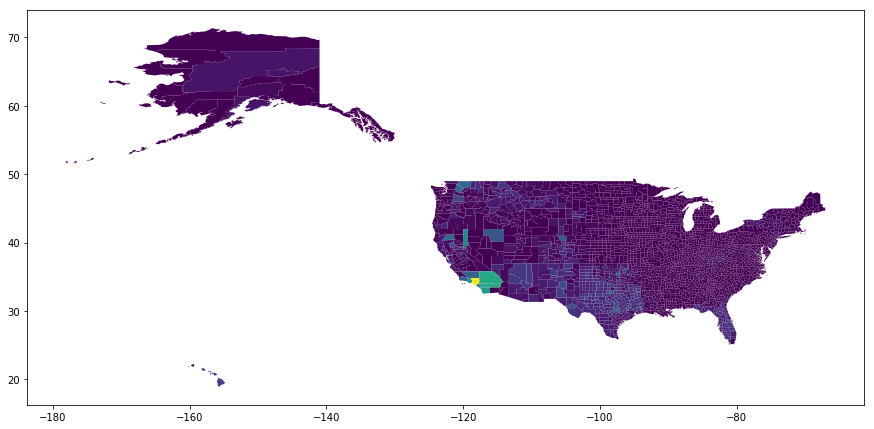

In [72]:
counties2.plot(column='Fire', figsize=(15,15));

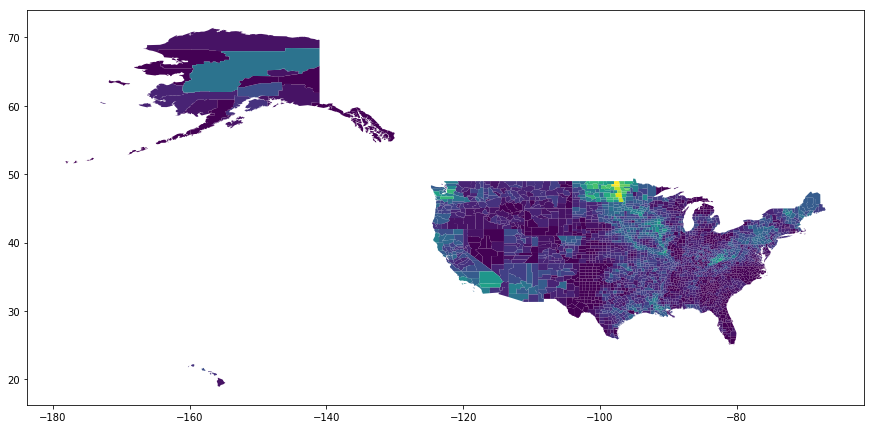

In [74]:
counties2.plot(column='Flood', figsize=(15,15));

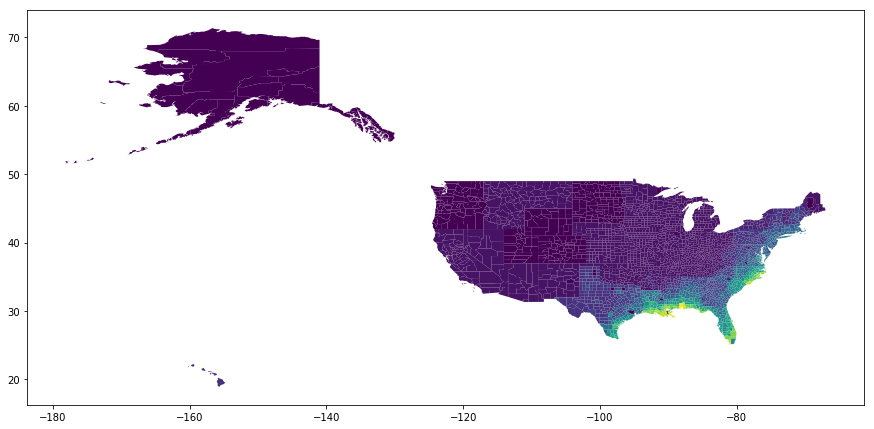

In [77]:
counties2.plot(column='Hurricane', figsize=(15,15));

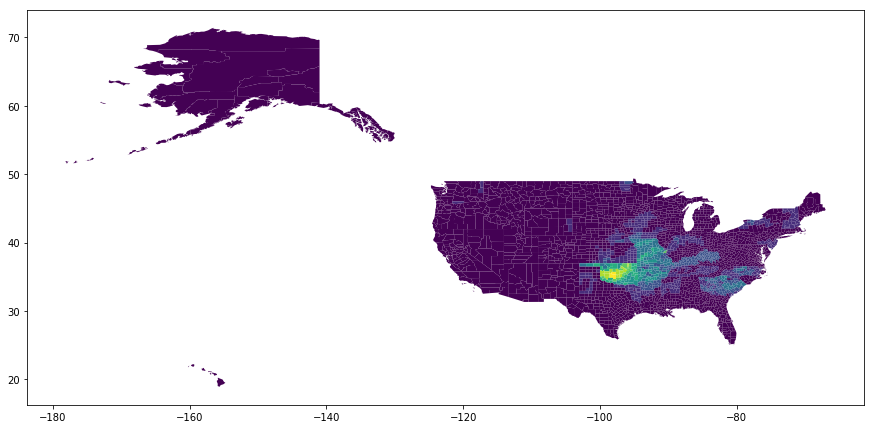

In [80]:
counties2.plot(column='Severe Ice Storm', figsize=(15,15));

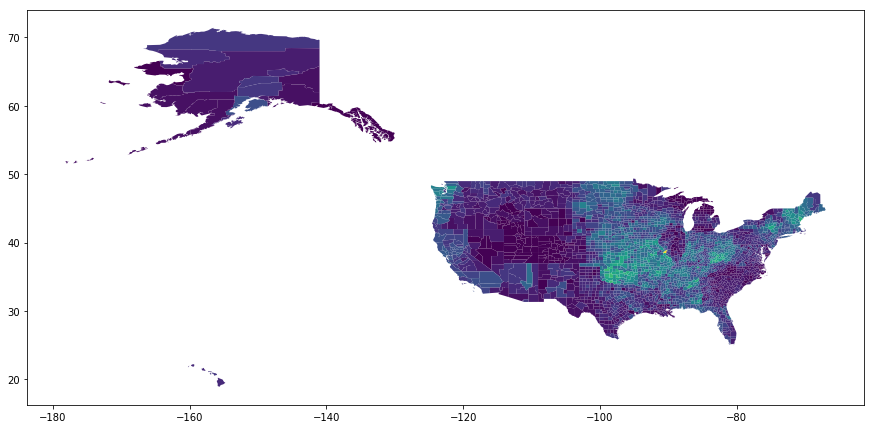

In [81]:
counties2.plot(column='Severe Storm(s)', figsize=(15,15));

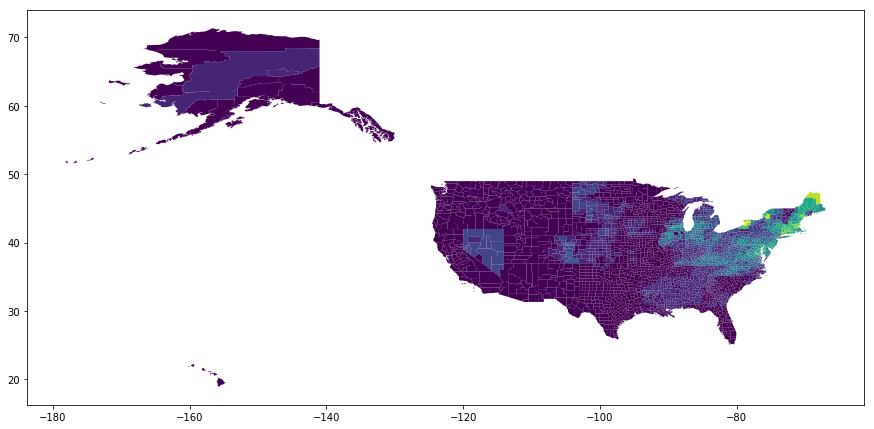

In [82]:
counties2.plot(column='Snow', figsize=(15,15));

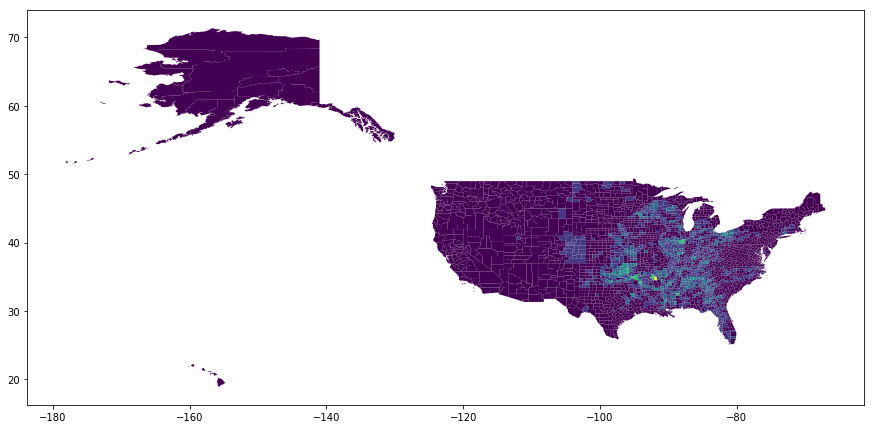

In [84]:
counties2.plot(column='Tornado', figsize=(15,15));

### Plots of Excluded Layers

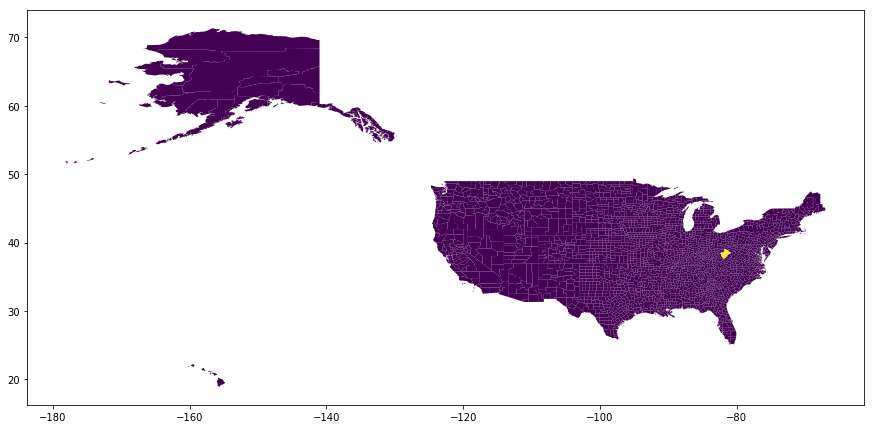

In [68]:
counties2.plot(column='Chemical', figsize=(15,15));

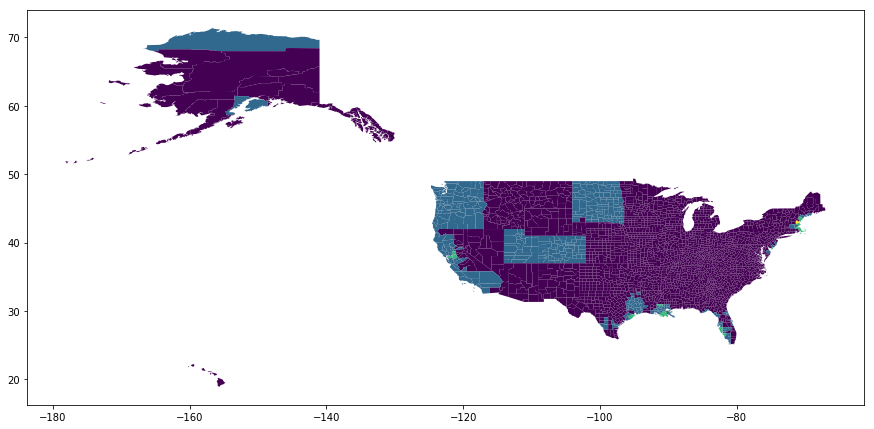

In [69]:
counties2.plot(column='Coastal Storm', figsize=(15,15));

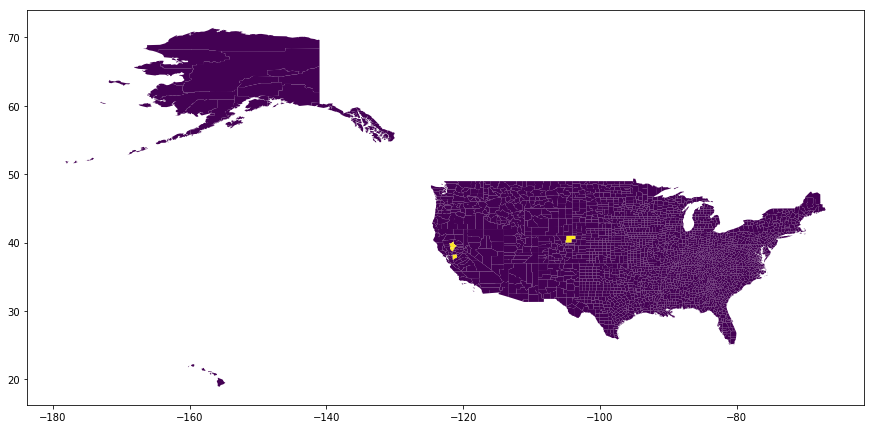

In [70]:
counties2.plot(column='Dam/Levee Break', figsize=(15,15));

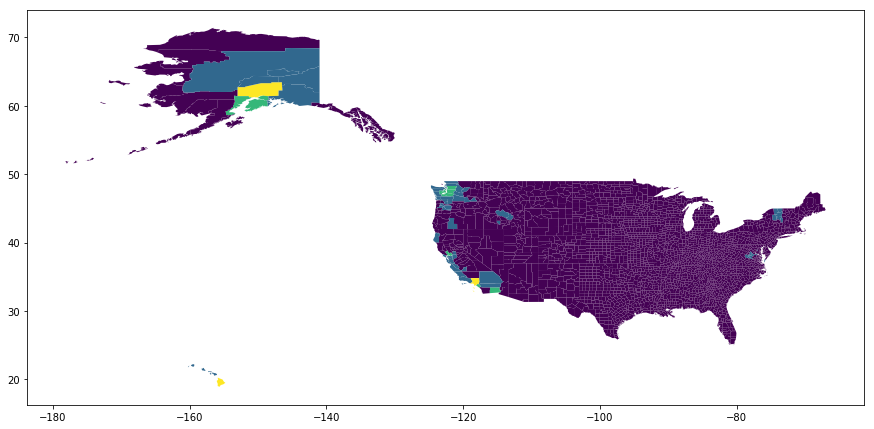

In [71]:
counties2.plot(column='Earthquake', figsize=(15,15));

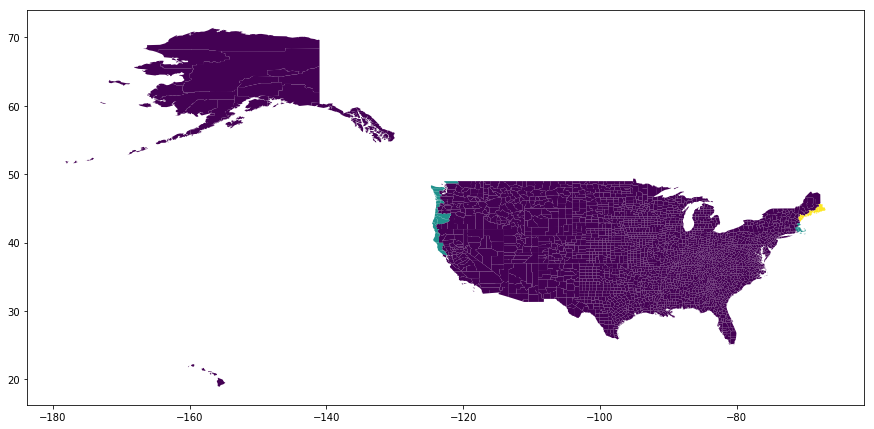

In [73]:
counties2.plot(column='Fishing Losses', figsize=(15,15));

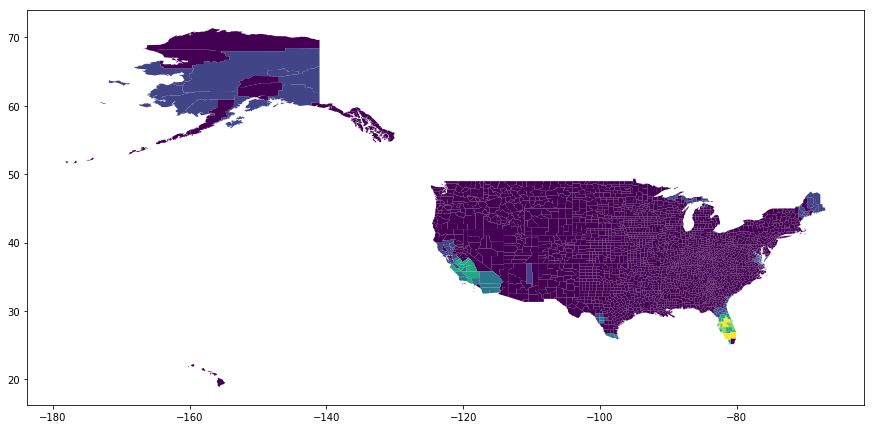

In [75]:
counties2.plot(column='Freezing', figsize=(15,15));

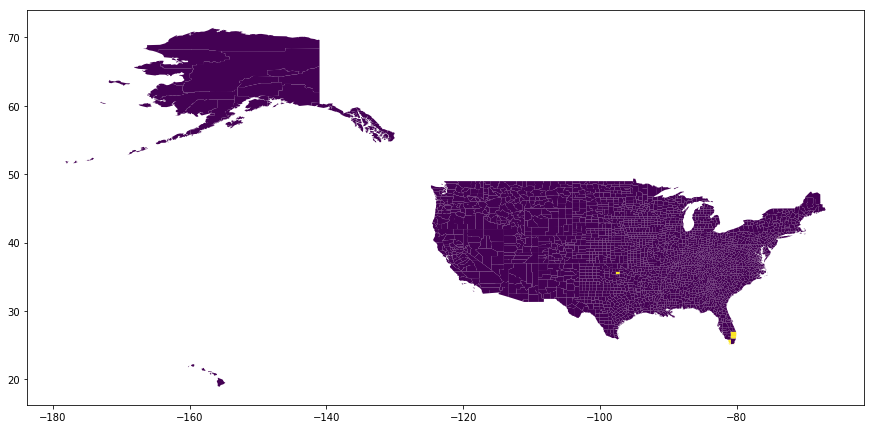

In [76]:
counties2.plot(column='Human Cause', figsize=(15,15));

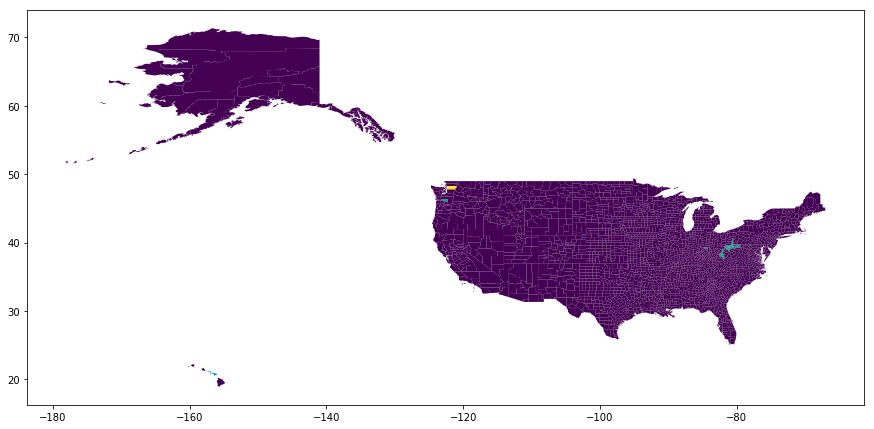

In [78]:
counties2.plot(column='Mud/Landslide', figsize=(15,15));

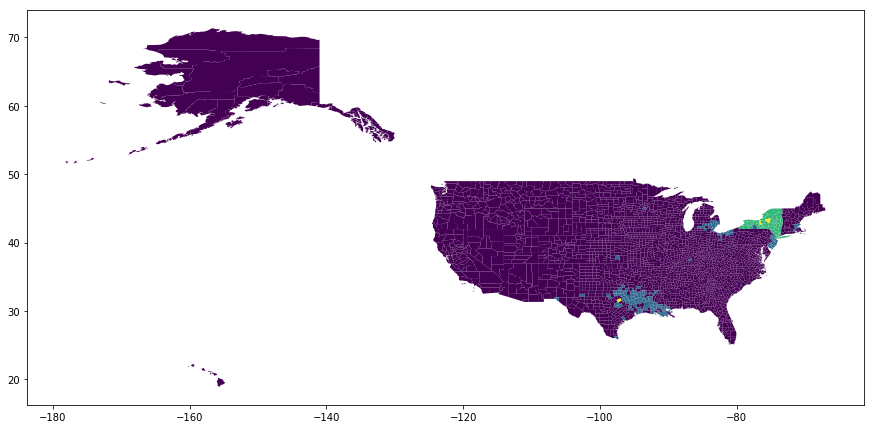

In [79]:
counties2.plot(column='Other', figsize=(15,15));

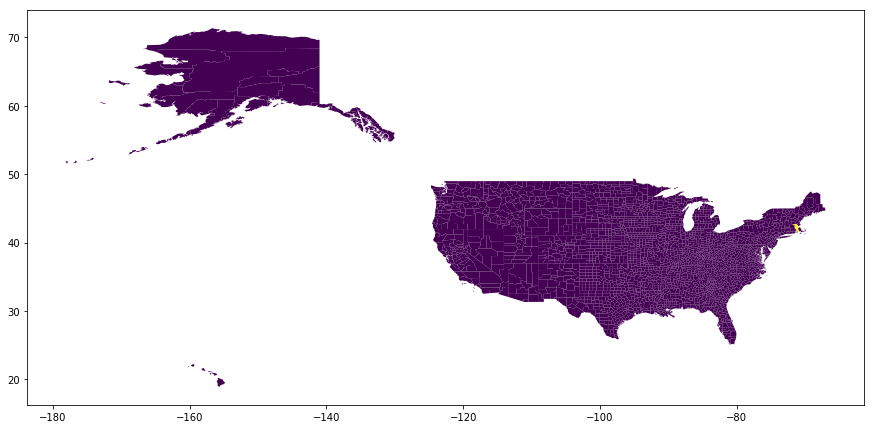

In [83]:
counties2.plot(column='Terrorist', figsize=(15,15));

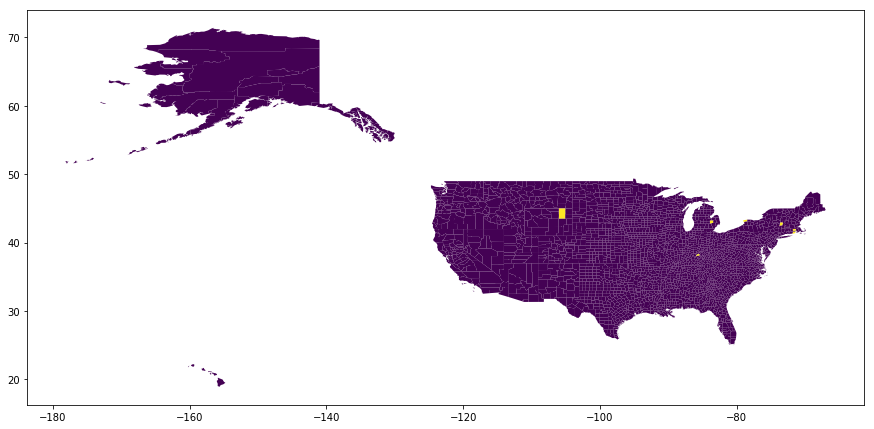

In [85]:
counties2.plot(column='Toxic Substances', figsize=(15,15));

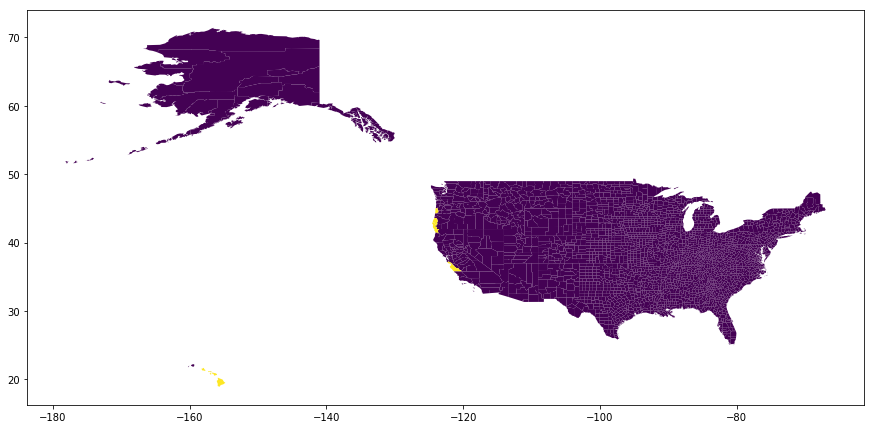

In [86]:
counties2.plot(column='Tsunami', figsize=(15,15));

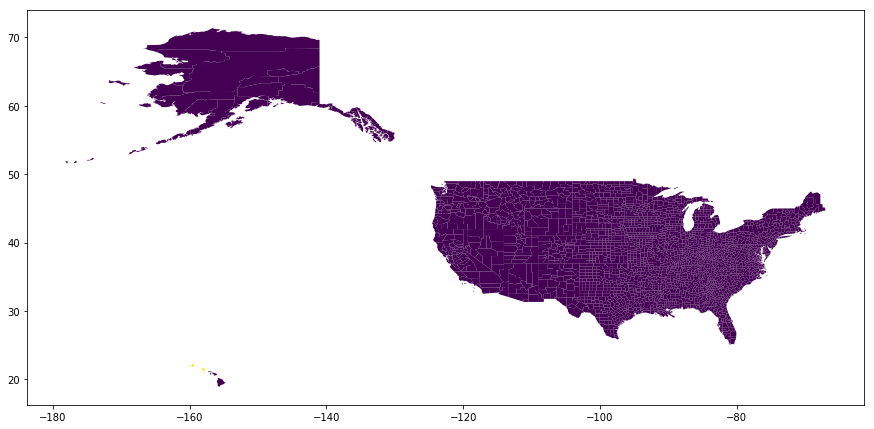

In [87]:
counties2.plot(column='Typhoon', figsize=(15,15));

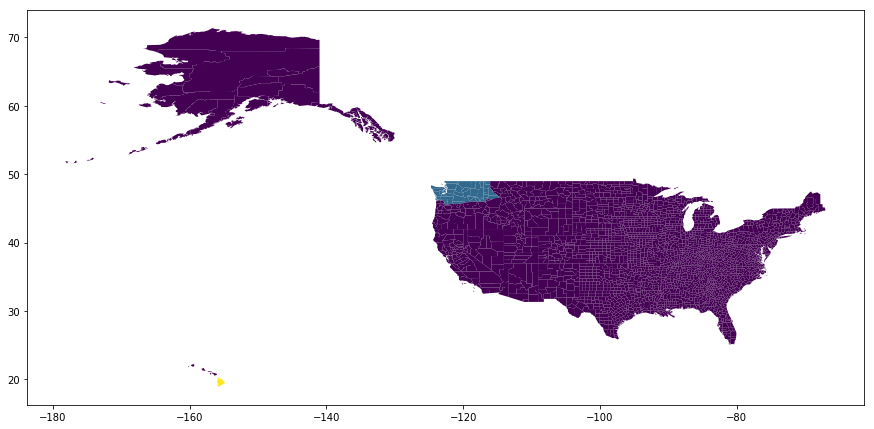

In [88]:
counties2.plot(column='Volcano', figsize=(15,15));